<a href="https://colab.research.google.com/github/jaesung93/CNN_tutorial-tensorflow-/blob/master/CNN_tutorial_answer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.2.0


In [30]:
# Load dataset
cifar10 = keras.datasets.cifar10

print(cifar10)

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

<module 'tensorflow.keras.datasets.cifar10' from '/usr/local/lib/python3.6/dist-packages/tensorflow/keras/datasets/cifar10/__init__.py'>
(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [0]:
class_names =  ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

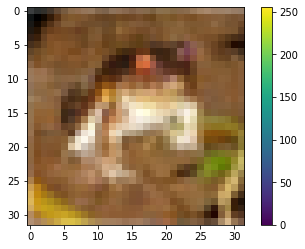

In [32]:
# Cifar10 example
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
train_images = train_images / 255.0
test_images = test_images / 255.0

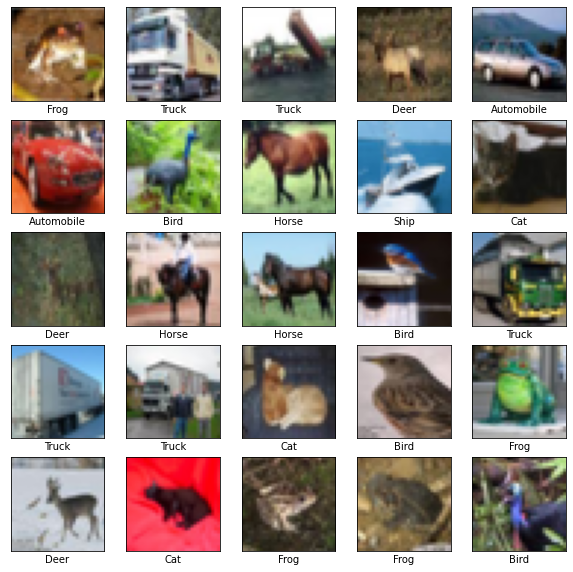

In [34]:
# Show images and labels
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [0]:
# For logging
class CollectBatchStats(tf.keras.callbacks.Callback):
  def __init__(self):
    self.batch_losses = []
    self.batch_acc = []
    self.epoch_val_acc = []
    
  def on_batch_end(self, batch, logs=None):
    self.batch_losses.append(logs['loss'])
    self.batch_acc.append(logs['accuracy'])
   
  def on_epoch_end(self, epoch, logs=None):
    self.epoch_val_acc.append(logs['val_accuracy'])
    
    
def scheduler(epoch, lr):
  """Helper function to retrieve the scheduled learning rate based on epoch."""
  if epoch == 40 or epoch ==60 : 
    lr = lr  * 0.1
  else:
    lr = lr
  return lr

<a href="https://ibb.co/6Y82nPk"><img src="https://i.ibb.co/cJwPgFj/fc.png" alt="fc" border="0"></a>

In [36]:
# Fully connected network without ReLU
fc_without_relu_model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3)),
    keras.layers.Dense(28*28*8),
    keras.layers.Dense(24*24*8),
    keras.layers.Reshape((24, 24, 8)),
    keras.layers.MaxPool2D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(8*8*16),
    keras.layers.Dense(4*4*16),
    keras.layers.Reshape((4, 4, 16)),
    keras.layers.MaxPool2D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])
fc_without_relu_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_15 (Flatten)         (None, 3072)              0         
_________________________________________________________________
dense_19 (Dense)             (None, 6272)              19273856  
_________________________________________________________________
dense_20 (Dense)             (None, 4608)              28905984  
_________________________________________________________________
reshape_4 (Reshape)          (None, 24, 24, 8)         0         
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 12, 12, 8)         0         
_________________________________________________________________
flatten_16 (Flatten)         (None, 1152)              0         
_________________________________________________________________
dense_21 (Dense)             (None, 1024)             

In [0]:
# Compile fully connected network without ReLU
fc_without_relu_model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy']
)

In [0]:
# Train fully connected network without ReLU
fc_without_relu_batch_stats = CollectBatchStats()

fc_without_relu_model.fit(train_images, train_labels,
             batch_size=128,
             epochs=70,
             callbacks=[fc_without_relu_batch_stats, tf.keras.callbacks.LearningRateScheduler(scheduler)],
             validation_data=(test_images, test_labels))

391/391 [==============================] - 11s 27ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000 - lr: 1.0000e-03
Epoch 43/70
391/391 [==============================] - 11s 27ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000 - lr: 1.0000e-03
Epoch 44/70
391/391 [==============================] - 10s 27ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000 - lr: 1.0000e-03
Epoch 45/70
391/391 [==============================] - 11s 27ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000 - lr: 1.0000e-03
Epoch 46/70
391/391 [==============================] - 11s 27ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000 - lr: 1.0000e-03
Epoch 47/70
195/391 [=============>................] - ETA: 5s - loss: nan - accuracy: 0.1009

In [0]:
# show train losses, train accuracy, test accuracy
plt.figure()
plt.ylabel("Loss")
plt.xlabel("Training Steps")
plt.ylim([0,2])
plt.plot(fc_without_relu_batch_stats.batch_losses)

plt.figure()
plt.ylabel("Training Accuracy")
plt.xlabel("Training Steps")
plt.ylim([0,1])
plt.plot(fc_without_relu_batch_stats.batch_acc)

plt.figure()
plt.ylabel("Test Accuracy")
plt.xlabel("Epochs")
plt.ylim([0,1])
plt.plot(fc_without_relu_batch_stats.epoch_val_acc)

In [0]:
# Fully connected network
fc_model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3)),
    keras.layers.Dense(28*28*8, activation=tf.nn.relu),
    keras.layers.Dense(24*24*8, activation=tf.nn.relu),
    keras.layers.Reshape((24, 24, 8)),
    keras.layers.MaxPool2D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(8*8*16, activation=tf.nn.relu),
    keras.layers.Dense(4*4*16, activation=tf.nn.relu),
    keras.layers.Reshape((4, 4, 16)),
    keras.layers.MaxPool2D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])
fc_model.summary()

In [0]:
# Compile fully connected network
fc_model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy']
)

In [0]:
# Train fully connected network
fc_batch_stats = CollectBatchStats()

fc_model.fit(train_images, train_labels,
             batch_size=128,
             epochs=70,
             callbacks=[fc_batch_stats, tf.keras.callbacks.LearningRateScheduler(scheduler)],
             validation_data=(test_images, test_labels))

In [0]:
# show train losses, train accuracy, test accuracy
plt.figure()
plt.ylabel("Loss")
plt.xlabel("Training Steps")
plt.ylim([0,2])
plt.plot(fc_batch_stats.batch_losses)

plt.figure()
plt.ylabel("Training Accuracy")
plt.xlabel("Training Steps")
plt.ylim([0,1])
plt.plot(fc_batch_stats.batch_acc)

plt.figure()
plt.ylabel("Test Accuracy")
plt.xlabel("Epochs")
plt.ylim([0,1])
plt.plot(fc_batch_stats.epoch_val_acc)

<a href="https://ibb.co/ZdYWYxN"><img src="https://i.ibb.co/Tcbmbtr/cnn.png" alt="cnn" border="0"></a>

In [0]:
# Convolutional neural network
cnn_model = keras.Sequential([
    keras.layers.Conv2D(filters=8, kernel_size=5, activation=tf.nn.relu, input_shape=(32, 32, 3)),
    keras.layers.Conv2D(filters=8, kernel_size=5, activation=tf.nn.relu),
    keras.layers.MaxPool2D(2),
    keras.layers.Conv2D(16, 5, activation=tf.nn.relu),
    keras.layers.Conv2D(16, 5, activation=tf.nn.relu),
    keras.layers.MaxPool2D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])
cnn_model.summary()

# Compile CNN model
cnn_model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy']
)

cnn_batch_stats = CollectBatchStats()

# Train CNN model
cnn_model.fit(train_images, train_labels,
              batch_size=128,
              epochs=70,
              callbacks=[cnn_batch_stats, tf.keras.callbacks.LearningRateScheduler(scheduler)],
              validation_data=(test_images, test_labels))

plt.figure()
plt.ylabel("Loss")
plt.xlabel("Training Steps")
plt.ylim([0,2])
plt.plot(cnn_batch_stats.batch_losses)

plt.figure()
plt.ylabel("Train Accuracy")
plt.xlabel("Training Steps")
plt.ylim([0,1])
plt.plot(cnn_batch_stats.batch_acc)

plt.figure()
plt.ylabel("Test Accuracy")
plt.xlabel("Epochs")
plt.ylim([0,1])
plt.plot(cnn_batch_stats.epoch_val_acc)

In [0]:
# Compare fully-connected network and CNN network
plt.figure()
plt.ylabel("Loss")
plt.xlabel("Training Steps")
plt.ylim([0,2])
plt.plot(fc_batch_stats.batch_losses, label='fc')
plt.plot(cnn_batch_stats.batch_losses, label='cnn')
plt.legend(loc='upper right')


plt.figure()
plt.ylabel("Training Accuracy")
plt.xlabel("Training Steps")
plt.ylim([0,1])
plt.plot(fc_batch_stats.batch_acc, label='fc')
plt.plot(cnn_batch_stats.batch_acc, label='cnn')
plt.legend(loc='upper right')


plt.figure()
plt.ylabel("Test Accuracy")
plt.xlabel("Epochs")
plt.ylim([0,1])
plt.plot(fc_batch_stats.epoch_val_acc, label='fc')
plt.plot(cnn_batch_stats.epoch_val_acc, label='cnn')
plt.legend(loc='upper right')

fc_test_loss, fc_test_acc = fc_model.evaluate(test_images, test_labels)
cnn_test_loss, cnn_test_acc = cnn_model.evaluate(test_images, test_labels)

print('fc test accuracy : ' + str(fc_test_acc))
print('cnn test accuracy : ' + str(cnn_test_acc))

<a href="https://ibb.co/3fw8kGR"><img src="https://i.ibb.co/yhDMVG4/vgg.png" alt="vgg" border="0"></a>

In [0]:
# VGG network
vgg_model = keras.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=3, strides=(1, 1), padding='same', input_shape=(32, 32, 3)),
    keras.layers.ReLU(),
    keras.layers.Conv2D(filters=32, kernel_size=3, strides=(1, 1), padding='same'),
    keras.layers.ReLU(),
    keras.layers.Conv2D(filters=32, kernel_size=3, strides=(1, 1), padding='same'),
    keras.layers.ReLU(),
    keras.layers.MaxPool2D(2),
    keras.layers.Conv2D(filters=64, kernel_size=3, strides=(1, 1), padding='same'),
    keras.layers.ReLU(),
    keras.layers.Conv2D(filters=64, kernel_size=3, strides=(1, 1), padding='same'),
    keras.layers.ReLU(),
    keras.layers.Conv2D(filters=64, kernel_size=3, strides=(1, 1), padding='same'),
    keras.layers.ReLU(),
    keras.layers.MaxPool2D(2),
    keras.layers.Conv2D(filters=128, kernel_size=3, strides=(1, 1), padding='same'),
    keras.layers.ReLU(),
    keras.layers.Conv2D(filters=128, kernel_size=3, strides=(1, 1), padding='same'),
    keras.layers.ReLU(),
    keras.layers.Conv2D(filters=128, kernel_size=3, strides=(1, 1), padding='same'),
    keras.layers.ReLU(),
    keras.layers.AveragePooling2D(pool_size=(8, 8)),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])
vgg_model.summary()

vgg_model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy']
)

vgg_batch_stats = CollectBatchStats()

vgg_model.fit(train_images, train_labels,
              batch_size=128,
              epochs=70,
              callbacks=[vgg_batch_stats, tf.keras.callbacks.LearningRateScheduler(scheduler)],
              validation_data=(test_images, test_labels))

plt.figure()
plt.ylabel("Loss")
plt.xlabel("Training Steps")
plt.ylim([0,2])
plt.plot(vgg_batch_stats.batch_losses)

plt.figure()
plt.ylabel("Train Accuracy")
plt.xlabel("Training Steps")
plt.ylim([0,1])
plt.plot(vgg_batch_stats.batch_acc)

plt.figure()
plt.ylabel("Test Accuracy")
plt.xlabel("Epochs")
plt.ylim([0,1])
plt.plot(vgg_batch_stats.epoch_val_acc)


vgg_test_loss, vgg_test_acc = vgg_model.evaluate(test_images, test_labels)
print('VGG test accuracy : ' + str(vgg_test_acc))

In [0]:
# Compare simple CNN network and VGG network
plt.figure()
plt.ylabel("Loss")
plt.xlabel("Training Steps")
plt.ylim([0,2])
plt.plot(cnn_batch_stats.batch_losses, label='simple cnn')
plt.plot(vgg_batch_stats.batch_losses, label='vgg')
plt.legend(loc='upper right')


plt.figure()
plt.ylabel("Training Accuracy")
plt.xlabel("Training Steps")
plt.ylim([0,1])
plt.plot(cnn_batch_stats.batch_acc, label='simple cnn')
plt.plot(vgg_batch_stats.batch_acc, label='vgg')
plt.legend(loc='upper right')


plt.figure()
plt.ylabel("Test Accuracy")
plt.xlabel("Epochs")
plt.ylim([0,1])
plt.plot(cnn_batch_stats.epoch_val_acc, label='simple cnn')
plt.plot(vgg_batch_stats.epoch_val_acc, label='vgg')
plt.legend(loc='upper right')

cnn_test_loss, cnn_test_acc = cnn_model.evaluate(test_images, test_labels)
vgg_test_loss, vgg_test_acc = vgg_model.evaluate(test_images, test_labels)

print('simple cnn test accuracy : ' + str(cnn_test_acc))
print('vgg test accuracy : ' + str(vgg_test_acc))

<a href="https://ibb.co/YBT4Bx3"><img src="https://i.ibb.co/4RgwRH7/resnet.png" alt="resnet" border="0"></a>

In [0]:
# Residual network
input = keras.layers.Input(shape=(32, 32, 3))
x = keras.layers.Conv2D(32, kernel_size=3, padding='same', strides=(1, 1))(input)
x = keras.layers.ReLU()(x)
skip = x
x = keras.layers.Conv2D(32, kernel_size=3, padding='same', strides=(1, 1))(x)
x = keras.layers.ReLU()(x)
x = keras.layers.Conv2D(32, kernel_size=3, padding='same', strides=(1, 1))(x)
x = keras.layers.Add()([x, skip])
x = keras.layers.ReLU()(x)
x = keras.layers.MaxPool2D(2)(x)
x = keras.layers.Conv2D(64, kernel_size=3, padding='same', strides=(1, 1))(x)
x = keras.layers.ReLU()(x)
skip = x
x = keras.layers.Conv2D(64, kernel_size=3, padding='same', strides=(1, 1))(x)
x = keras.layers.ReLU()(x)
x = keras.layers.Conv2D(64, kernel_size=3, padding='same', strides=(1, 1))(x)
x = keras.layers.Add()([x, skip])
x = keras.layers.ReLU()(x)
x = keras.layers.MaxPool2D(2)(x)
x = keras.layers.Conv2D(128, kernel_size=3, padding='same', strides=(1, 1))(x)
x = keras.layers.ReLU()(x)
skip = x
x = keras.layers.Conv2D(128, kernel_size=3, padding='same', strides=(1, 1))(x)
x = keras.layers.ReLU()(x)
x = keras.layers.Conv2D(128, kernel_size=3, padding='same', strides=(1, 1))(x)
x = keras.layers.Add()([x, skip])
x = keras.layers.ReLU()(x)
x = keras.layers.AveragePooling2D(pool_size=(8, 8))(x)
x = keras.layers.Flatten()(x)
output = keras.layers.Dense(10, activation=tf.nn.softmax)(x)

resnet_model = keras.models.Model(input, output)
resnet_model.summary()

resnet_model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy']
)

resnet_batch_stats = CollectBatchStats()

resnet_model.fit(train_images, train_labels,
              batch_size=128,
              epochs=70,
              callbacks=[resnet_batch_stats, tf.keras.callbacks.LearningRateScheduler(scheduler)],
              validation_data=(test_images, test_labels))

plt.figure()
plt.ylabel("Loss")
plt.xlabel("Training Steps")
plt.ylim([0,2])
plt.plot(resnet_batch_stats.batch_losses)

plt.figure()
plt.ylabel("Train Accuracy")
plt.xlabel("Training Steps")
plt.ylim([0,1])
plt.plot(resnet_batch_stats.batch_acc)

plt.figure()
plt.ylabel("Test Accuracy")
plt.xlabel("Epochs")
plt.ylim([0,1])
plt.plot(resnet_batch_stats.epoch_val_acc)

resnet_test_loss, resnet_test_acc = resnet_model.evaluate(test_images, test_labels)
print('Resnet test accuracy : ' + str(resnet_test_acc))

In [0]:
# Compare VGG network and Residual network
plt.figure()
plt.ylabel("Loss")
plt.xlabel("Training Steps")
plt.ylim([0,2])
plt.plot(vgg_batch_stats.batch_losses, label='vgg')
plt.plot(resnet_batch_stats.batch_losses, label='resnet')
plt.legend(loc='upper right')


plt.figure()
plt.ylabel("Training Accuracy")
plt.xlabel("Training Steps")
plt.ylim([0,1])
plt.plot(vgg_batch_stats.batch_acc, label='vgg')
plt.plot(resnet_batch_stats.batch_acc, label='resnet')
plt.legend(loc='upper right')


plt.figure()
plt.ylabel("Test Accuracy")
plt.xlabel("Epochs")
plt.ylim([0,1])
plt.plot(vgg_batch_stats.epoch_val_acc, label='vgg')
plt.plot(resnet_batch_stats.epoch_val_acc, label='resnet')
plt.legend(loc='upper right')

vgg_test_loss, vgg_test_acc = vgg_model.evaluate(test_images, test_labels)
resnet_test_loss, resnet_test_acc = resnet_model.evaluate(test_images, test_labels)

print('vgg test accuracy : ' + str(vgg_test_acc))
print('resnet test accuracy : ' + str(resnet_test_acc))

In [0]:
# VGG network very deep
vgg_very_deep_model = keras.Sequential([
    keras.layers.Conv2D(filters=16, kernel_size=3, strides=(1, 1), padding='same', input_shape=(32, 32, 3)),
    keras.layers.ReLU(),
    keras.layers.Conv2D(filters=16, kernel_size=3, strides=(1, 1), padding='same'),
    keras.layers.ReLU(),
    keras.layers.Conv2D(filters=16, kernel_size=3, strides=(1, 1), padding='same'),
    keras.layers.ReLU(),
    keras.layers.Conv2D(filters=16, kernel_size=3, strides=(1, 1), padding='same'),
    keras.layers.ReLU(),
    keras.layers.Conv2D(filters=16, kernel_size=3, strides=(1, 1), padding='same'),
    keras.layers.ReLU(),
    keras.layers.Conv2D(filters=16, kernel_size=3, strides=(1, 1), padding='same'),
    keras.layers.ReLU(),
    
    keras.layers.MaxPool2D(2),
    
    keras.layers.Conv2D(filters=16, kernel_size=3, strides=(1, 1), padding='same'),
    keras.layers.ReLU(),
    keras.layers.Conv2D(filters=16, kernel_size=3, strides=(1, 1), padding='same'),
    keras.layers.ReLU(),
    keras.layers.Conv2D(filters=16, kernel_size=3, strides=(1, 1), padding='same'),
    keras.layers.ReLU(),
    keras.layers.Conv2D(filters=16, kernel_size=3, strides=(1, 1), padding='same'),
    keras.layers.ReLU(),
    keras.layers.Conv2D(filters=16, kernel_size=3, strides=(1, 1), padding='same'),
    keras.layers.ReLU(),
    keras.layers.Conv2D(filters=16, kernel_size=3, strides=(1, 1), padding='same'),
    keras.layers.ReLU(),
    
    keras.layers.MaxPool2D(2),
    
    keras.layers.Conv2D(filters=16, kernel_size=3, strides=(1, 1), padding='same'),
    keras.layers.ReLU(),
    keras.layers.Conv2D(filters=16, kernel_size=3, strides=(1, 1), padding='same'),
    keras.layers.ReLU(),
    keras.layers.Conv2D(filters=16, kernel_size=3, strides=(1, 1), padding='same'),
    keras.layers.ReLU(),
    keras.layers.Conv2D(filters=16, kernel_size=3, strides=(1, 1), padding='same'),
    keras.layers.ReLU(),
    keras.layers.Conv2D(filters=16, kernel_size=3, strides=(1, 1), padding='same'),
    keras.layers.ReLU(),
    keras.layers.Conv2D(filters=16, kernel_size=3, strides=(1, 1), padding='same'),
    keras.layers.ReLU(),

    keras.layers.AveragePooling2D(pool_size=(8, 8)),

    keras.layers.Flatten(),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])
vgg_very_deep_model.summary()

vgg_very_deep_model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy']
)

vgg_very_deep_batch_stats = CollectBatchStats()

vgg_very_deep_model.fit(train_images, train_labels,
              batch_size=128,
              epochs=70,
              callbacks=[vgg_very_deep_batch_stats, tf.keras.callbacks.LearningRateScheduler(scheduler)],
              validation_data=(test_images, test_labels))

# Residual network very deep
input = keras.layers.Input(shape=(32, 32, 3))
x = keras.layers.Conv2D(16, kernel_size=3, padding='same', strides=(1, 1))(input)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.ReLU()(x)
skip = x
x = keras.layers.Conv2D(16, kernel_size=3, padding='same', strides=(1, 1))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.ReLU()(x)
x = keras.layers.Conv2D(16, kernel_size=3, padding='same', strides=(1, 1))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Add()([x, skip])
x = keras.layers.ReLU()(x)
x = keras.layers.Conv2D(16, kernel_size=3, padding='same', strides=(1, 1))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.ReLU()(x)
skip = x
x = keras.layers.Conv2D(16, kernel_size=3, padding='same', strides=(1, 1))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.ReLU()(x)
x = keras.layers.Conv2D(16, kernel_size=3, padding='same', strides=(1, 1))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Add()([x, skip])
x = keras.layers.ReLU()(x)

x = keras.layers.MaxPool2D(2)(x)

x = keras.layers.Conv2D(16, kernel_size=3, padding='same', strides=(1, 1))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.ReLU()(x)
skip = x
x = keras.layers.Conv2D(16, kernel_size=3, padding='same', strides=(1, 1))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.ReLU()(x)
x = keras.layers.Conv2D(16, kernel_size=3, padding='same', strides=(1, 1))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Add()([x, skip])
x = keras.layers.ReLU()(x)
x = keras.layers.Conv2D(16, kernel_size=3, padding='same', strides=(1, 1))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.ReLU()(x)
skip = x
x = keras.layers.Conv2D(16, kernel_size=3, padding='same', strides=(1, 1))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.ReLU()(x)
x = keras.layers.Conv2D(16, kernel_size=3, padding='same', strides=(1, 1))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Add()([x, skip])
x = keras.layers.ReLU()(x)

x = keras.layers.MaxPool2D(2)(x)

x = keras.layers.Conv2D(16, kernel_size=3, padding='same', strides=(1, 1))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.ReLU()(x)
skip = x
x = keras.layers.Conv2D(16, kernel_size=3, padding='same', strides=(1, 1))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.ReLU()(x)
x = keras.layers.Conv2D(16, kernel_size=3, padding='same', strides=(1, 1))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Add()([x, skip])
x = keras.layers.ReLU()(x)
x = keras.layers.Conv2D(16, kernel_size=3, padding='same', strides=(1, 1))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.ReLU()(x)
skip = x
x = keras.layers.Conv2D(16, kernel_size=3, padding='same', strides=(1, 1))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.ReLU()(x)
x = keras.layers.Conv2D(16, kernel_size=3, padding='same', strides=(1, 1))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Add()([x, skip])
x = keras.layers.ReLU()(x)

x = keras.layers.AveragePooling2D(pool_size=(8, 8))(x)
x = keras.layers.Flatten()(x)

output = keras.layers.Dense(10, activation=tf.nn.softmax)(x)

resnet_very_deep_model = keras.models.Model(input, output)
resnet_very_deep_model.summary()

resnet_very_deep_model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy']
)

resnet_very_deep_batch_stats = CollectBatchStats()

resnet_very_deep_model.fit(train_images, train_labels,
              batch_size=128,
              epochs=70,
              callbacks=[resnet_very_deep_batch_stats, tf.keras.callbacks.LearningRateScheduler(scheduler)],
              validation_data=(test_images, test_labels))

# Compare VGG very deep network and Residual very deep network
plt.figure()
plt.ylabel("Loss")
plt.xlabel("Training Steps")
plt.ylim([0,2])
plt.plot(vgg_very_deep_batch_stats.batch_losses, label='vgg')
plt.plot(resnet_very_deep_batch_stats.batch_losses, label='resnet')
plt.legend(loc='upper right')


plt.figure()
plt.ylabel("Training Accuracy")
plt.xlabel("Training Steps")
plt.ylim([0,1])
plt.plot(vgg_very_deep_batch_stats.batch_acc, label='vgg')
plt.plot(resnet_very_deep_batch_stats.batch_acc, label='resnet')
plt.legend(loc='upper right')


plt.figure()
plt.ylabel("Test Accuracy")
plt.xlabel("Epochs")
plt.ylim([0,1])
plt.plot(vgg_very_deep_batch_stats.epoch_val_acc, label='vgg')
plt.plot(resnet_very_deep_batch_stats.epoch_val_acc, label='resnet')
plt.legend(loc='upper right')

vgg_very_deep_test_loss, vgg_very_deep_test_acc = vgg_very_deep_model.evaluate(test_images, test_labels)
resnet_very_deep_test_loss, resnet_very_deep_test_acc = resnet_very_deep_model.evaluate(test_images, test_labels)

print('vgg very deep test accuracy : ' + str(vgg_very_deep_test_acc))
print('resnet very deep test accuracy : ' + str(resnet_very_deep_test_acc))

In [0]:
# Residual network with weight decay
input = keras.layers.Input(shape=(32, 32, 3))
x = keras.layers.Conv2D(32, kernel_size=3, padding='same', strides=(1, 1), kernel_regularizer=keras.regularizers.l2(0.001))(input)
x = keras.layers.ReLU()(x)
skip=x
x = keras.layers.Conv2D(32, kernel_size=3, padding='same', strides=(1, 1), kernel_regularizer=keras.regularizers.l2(0.001))(x)
x = keras.layers.ReLU()(x)
x = keras.layers.Conv2D(32, kernel_size=3, padding='same', strides=(1, 1), kernel_regularizer=keras.regularizers.l2(0.001))(x)
x = keras.layers.Add()([x, skip])
x = keras.layers.ReLU()(x)
x = keras.layers.MaxPool2D(2)(x)
x = keras.layers.Conv2D(64, kernel_size=3, padding='same', strides=(1, 1), kernel_regularizer=keras.regularizers.l2(0.001))(x)
x = keras.layers.ReLU()(x)
skip = x
x = keras.layers.Conv2D(64, kernel_size=3, padding='same', strides=(1, 1), kernel_regularizer=keras.regularizers.l2(0.001))(x)
x = keras.layers.ReLU()(x)
x = keras.layers.Conv2D(64, kernel_size=3, padding='same', strides=(1, 1), kernel_regularizer=keras.regularizers.l2(0.001))(x)
x = keras.layers.Add()([x, skip])
x = keras.layers.ReLU()(x)
x = keras.layers.MaxPool2D(2)(x)
x = keras.layers.Conv2D(128, kernel_size=3, padding='same', strides=(1, 1), kernel_regularizer=keras.regularizers.l2(0.001))(x)
x = keras.layers.ReLU()(x)
skip = x
x = keras.layers.Conv2D(128, kernel_size=3, padding='same', strides=(1, 1), kernel_regularizer=keras.regularizers.l2(0.001))(x)
x = keras.layers.ReLU()(x)
x = keras.layers.Conv2D(128, kernel_size=3, padding='same', strides=(1, 1), kernel_regularizer=keras.regularizers.l2(0.001))(x)
x = keras.layers.Add()([x, skip])
x = keras.layers.ReLU()(x)
x = keras.layers.AveragePooling2D(pool_size=(8, 8))(x)
x = keras.layers.Flatten()(x)
output = keras.layers.Dense(10, activation=tf.nn.softmax, kernel_regularizer=keras.regularizers.l2(0.001))(x)

resnet_with_weight_decay_model = keras.models.Model(input, output)
resnet_with_weight_decay_model.summary()

resnet_with_weight_decay_model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
                      loss='sparse_categorical_crossentropy',
                  metrics=['accuracy']
)

resnet_with_weight_decay_batch_stats = CollectBatchStats()

resnet_with_weight_decay_model.fit(train_images, train_labels,
              batch_size=128,
              epochs=70,
              callbacks=[resnet_with_weight_decay_batch_stats, tf.keras.callbacks.LearningRateScheduler(scheduler)],
              validation_data=(test_images, test_labels))

plt.figure()
plt.ylabel("Loss")
plt.xlabel("Training Steps")
plt.ylim([0,2])
plt.plot(resnet_with_weight_decay_batch_stats.batch_losses)

plt.figure()
plt.ylabel("Train Accuracy")
plt.xlabel("Training Steps")
plt.ylim([0,1])
plt.plot(resnet_with_weight_decay_batch_stats.batch_acc)

plt.figure()
plt.ylabel("Test Accuracy")
plt.xlabel("Epochs")
plt.ylim([0,1])
plt.plot(resnet_with_weight_decay_batch_stats.epoch_val_acc)

resnet_with_weight_decay_test_loss, resnet_with_weight_decay_test_acc = resnet_with_weight_decay_model.evaluate(test_images, test_labels)
print('Resnet test accuracy : ' + str(resnet_with_weight_decay_test_acc))

In [0]:
# Compare Residual network and Residual network with weight decay
plt.figure()
plt.ylabel("Loss")
plt.xlabel("Training Steps")
plt.ylim([0,2])
plt.plot(resnet_batch_stats.batch_losses, label='resnet')
plt.plot(resnet_with_weight_decay_batch_stats.batch_losses, label='resnet with weight decay')
plt.legend(loc='upper right')


plt.figure()
plt.ylabel("Training Accuracy")
plt.xlabel("Training Steps")
plt.ylim([0,1])
plt.plot(resnet_batch_stats.batch_acc, label='resnet')
plt.plot(resnet_with_weight_decay_batch_stats.batch_acc, label='resnet with weight decay')
plt.legend(loc='upper right')


plt.figure()
plt.ylabel("Test Accuracy")
plt.xlabel("Epochs")
plt.ylim([0,1])
plt.plot(resnet_batch_stats.epoch_val_acc, label='resnet')
plt.plot(resnet_with_weight_decay_batch_stats.epoch_val_acc, label='resnet with weight decay')
plt.legend(loc='upper right')

resnet_test_loss, resnet_test_acc = resnet_model.evaluate(test_images, test_labels)
resnet_with_weight_decay_test_loss, resnet_with_weight_decay_test_acc = resnet_with_weight_decay_model.evaluate(test_images, test_labels)

print('resnet test accuracy : ' + str(resnet_test_acc))
print('resnet with weight decay test accuracy : ' + str(resnet_with_weight_decay_test_acc))

In [0]:
# Residual network with dropout
input = keras.layers.Input(shape=(32, 32, 3))
x = keras.layers.Conv2D(32, kernel_size=3, padding='same', strides=(1, 1))(input)
x = keras.layers.ReLU()(x)
skip = x
x = keras.layers.Conv2D(32, kernel_size=3, padding='same', strides=(1, 1))(x)
x = keras.layers.ReLU()(x)
x = keras.layers.Conv2D(32, kernel_size=3, padding='same', strides=(1, 1))(x)
x = keras.layers.Add()([x, skip])
x = keras.layers.ReLU()(x)
x = keras.layers.MaxPool2D(2)(x)
x = keras.layers.Conv2D(64, kernel_size=3, padding='same', strides=(1, 1))(x)
x = keras.layers.ReLU()(x)
skip = x
x = keras.layers.Conv2D(64, kernel_size=3, padding='same', strides=(1, 1))(x)
x = keras.layers.ReLU()(x)
x = keras.layers.Conv2D(64, kernel_size=3, padding='same', strides=(1, 1))(x)
x = keras.layers.Add()([x, skip])
x = keras.layers.ReLU()(x)
x = keras.layers.MaxPool2D(2)(x)
x = keras.layers.Conv2D(128, kernel_size=3, padding='same', strides=(1, 1))(x)
x = keras.layers.ReLU()(x)
skip = x
x = keras.layers.Conv2D(128, kernel_size=3, padding='same', strides=(1, 1))(x)
x = keras.layers.ReLU()(x)
x = keras.layers.Conv2D(128, kernel_size=3, padding='same', strides=(1, 1))(x)
x = keras.layers.Add()([x, skip])
x = keras.layers.ReLU()(x)
x = keras.layers.AveragePooling2D(pool_size=(8, 8))(x)
x = keras.layers.Flatten()(x)
x = keras.layers.Dropout(rate=0.5)(x)
output = keras.layers.Dense(10, activation=tf.nn.softmax)(x)

resnet_dropout_model = keras.models.Model(input, output)
resnet_dropout_model.summary()

resnet_dropout_model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy']
)

resnet_dropout_batch_stats = CollectBatchStats()

resnet_dropout_model.fit(train_images, train_labels,
              batch_size=128,
              epochs=70,
              callbacks=[resnet_dropout_batch_stats, tf.keras.callbacks.LearningRateScheduler(scheduler)],
              validation_data=(test_images, test_labels))

plt.figure()
plt.ylabel("Loss")
plt.xlabel("Training Steps")
plt.ylim([0,2])
plt.plot(resnet_dropout_batch_stats.batch_losses)

plt.figure()
plt.ylabel("Train Accuracy")
plt.xlabel("Training Steps")
plt.ylim([0,1])
plt.plot(resnet_dropout_batch_stats.batch_acc)

plt.figure()
plt.ylabel("Test Accuracy")
plt.xlabel("Epochs")
plt.ylim([0,1])
plt.plot(resnet_dropout_batch_stats.epoch_val_acc)

resnet_dropout_test_loss, resnet_dropout_test_acc = resnet_dropout_model.evaluate(test_images, test_labels)
print('Resnet with dropout test accuracy : ' + str(resnet_dropout_test_acc))

In [0]:
# Residual network with batch normalization
input = keras.layers.Input(shape=(32, 32, 3))
x = keras.layers.Conv2D(32, kernel_size=3, padding='same', strides=(1, 1))(input)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.ReLU()(x)
x = keras.layers.Conv2D(32, kernel_size=3, padding='same', strides=(1, 1))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.ReLU()(x)
x = keras.layers.MaxPool2D(2)(x)
x = keras.layers.Conv2D(64, kernel_size=3, padding='same', strides=(1, 1))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.ReLU()(x)
skip = x
x = keras.layers.Conv2D(64, kernel_size=3, padding='same', strides=(1, 1))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.ReLU()(x)
x = keras.layers.Conv2D(64, kernel_size=3, padding='same', strides=(1, 1))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Add()([x, skip])
x = keras.layers.ReLU()(x)
x = keras.layers.MaxPool2D(2)(x)
x = keras.layers.Conv2D(128, kernel_size=3, padding='same', strides=(1, 1))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.ReLU()(x)
skip = x
x = keras.layers.Conv2D(128, kernel_size=3, padding='same', strides=(1, 1))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.ReLU()(x)
x = keras.layers.Conv2D(128, kernel_size=3, padding='same', strides=(1, 1))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Add()([x, skip])
x = keras.layers.ReLU()(x)
x = keras.layers.AveragePooling2D(pool_size=(8, 8))(x)
x = keras.layers.Flatten()(x)
output = keras.layers.Dense(10, activation=tf.nn.softmax)(x)

resnet_bn_model = keras.models.Model(input, output)
resnet_bn_model.summary()

resnet_bn_model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy']
)

resnet_bn_batch_stats = CollectBatchStats()

resnet_bn_model.fit(train_images, train_labels,
              batch_size=128,
              epochs=70,
              callbacks=[resnet_bn_batch_stats, tf.keras.callbacks.LearningRateScheduler(scheduler)],
              validation_data=(test_images, test_labels))

plt.figure()
plt.ylabel("Loss")
plt.xlabel("Training Steps")
plt.ylim([0,2])
plt.plot(resnet_bn_batch_stats.batch_losses)

plt.figure()
plt.ylabel("Train Accuracy")
plt.xlabel("Training Steps")
plt.ylim([0,1])
plt.plot(resnet_bn_batch_stats.batch_acc)

plt.figure()
plt.ylabel("Test Accuracy")
plt.xlabel("Epochs")
plt.ylim([0,1])
plt.plot(resnet_bn_batch_stats.epoch_val_acc)

resnet_bn_test_loss, resnet_bn_test_acc = resnet_bn_model.evaluate(test_images, test_labels)
print('Resnet with BN test accuracy : ' + str(resnet_bn_test_acc))

In [0]:
# Residual network with batch normalization and weight decay
input = keras.layers.Input(shape=(32, 32, 3))
x = keras.layers.Conv2D(32, kernel_size=3, padding='same', strides=(1, 1), kernel_regularizer=keras.regularizers.l2(0.001))(input)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.ReLU()(x)
skip=x
x = keras.layers.Conv2D(32, kernel_size=3, padding='same', strides=(1, 1), kernel_regularizer=keras.regularizers.l2(0.001))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.ReLU()(x)
x = keras.layers.Conv2D(32, kernel_size=3, padding='same', strides=(1, 1), kernel_regularizer=keras.regularizers.l2(0.001))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Add()([x, skip])
x = keras.layers.ReLU()(x)
x = keras.layers.MaxPool2D(2)(x)

x = keras.layers.Conv2D(64, kernel_size=3, padding='same', strides=(1, 1), kernel_regularizer=keras.regularizers.l2(0.001))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.ReLU()(x)
skip = x
x = keras.layers.Conv2D(64, kernel_size=3, padding='same', strides=(1, 1), kernel_regularizer=keras.regularizers.l2(0.001))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.ReLU()(x)
x = keras.layers.Conv2D(64, kernel_size=3, padding='same', strides=(1, 1), kernel_regularizer=keras.regularizers.l2(0.001))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Add()([x, skip])
x = keras.layers.ReLU()(x)
x = keras.layers.MaxPool2D(2)(x)

x = keras.layers.Conv2D(128, kernel_size=3, padding='same', strides=(1, 1), kernel_regularizer=keras.regularizers.l2(0.001))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.ReLU()(x)
skip = x
x = keras.layers.Conv2D(128, kernel_size=3, padding='same', strides=(1, 1), kernel_regularizer=keras.regularizers.l2(0.001))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.ReLU()(x)
x = keras.layers.Conv2D(128, kernel_size=3, padding='same', strides=(1, 1), kernel_regularizer=keras.regularizers.l2(0.001))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Add()([x, skip])
x = keras.layers.ReLU()(x)
x = keras.layers.AveragePooling2D(pool_size=(8, 8))(x)
x = keras.layers.Flatten()(x)
output = keras.layers.Dense(10, activation=tf.nn.softmax, kernel_regularizer=keras.regularizers.l2(0.001))(x)

resnet_bn_wd_model = keras.models.Model(input, output)
resnet_bn_wd_model.summary()

resnet_bn_wd_model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy']
)

resnet_bn_wd_batch_stats = CollectBatchStats()

resnet_bn_wd_model.fit(train_images, train_labels,
              batch_size=128,
              epochs=70,
              callbacks=[resnet_bn_wd_batch_stats,  tf.keras.callbacks.LearningRateScheduler(scheduler)],
              validation_data=(test_images, test_labels))

plt.figure()
plt.ylabel("Loss")
plt.xlabel("Training Steps")
plt.ylim([0,2])
plt.plot(resnet_bn_wd_batch_stats.batch_losses)

plt.figure()
plt.ylabel("Train Accuracy")
plt.xlabel("Training Steps")
plt.ylim([0,1])
plt.plot(resnet_bn_wd_batch_stats.batch_acc)

plt.figure()
plt.ylabel("Test Accuracy")
plt.xlabel("Epochs")
plt.ylim([0,1])
plt.plot(resnet_bn_wd_batch_stats.epoch_val_acc)

resnet_bn_wd_test_loss, resnet_bn_wd_test_acc = resnet_bn_wd_model.evaluate(test_images, test_labels)
print('Resnet with BN  and weight decay test accuracy : ' + str(resnet_bn_wd_test_acc))

In [0]:
# Compare residual network and residual network with batch normalization
plt.figure()
plt.ylabel("Loss")
plt.xlabel("Training Steps")
plt.ylim([0,2])
plt.plot(resnet_batch_stats.batch_losses, label='resnet')
plt.plot(resnet_with_weight_decay_batch_stats.batch_losses, label='resnet+weight_decay')
plt.plot(resnet_dropout_batch_stats.batch_losses, label='resnet+dropout')
plt.plot(resnet_bn_batch_stats.batch_losses, label='resnet+bn')
plt.plot(resnet_bn_wd_batch_stats.batch_losses, label='resnet+bn+weight_decay')
plt.legend(loc='upper right')


plt.figure()
plt.ylabel("Training Accuracy")
plt.xlabel("Training Steps")
plt.ylim([0,1])
plt.plot(resnet_batch_stats.batch_acc, label='resnet')
plt.plot(resnet_with_weight_decay_batch_stats.batch_acc, label='resnet+weight_decay')
plt.plot(resnet_dropout_batch_stats.batch_acc, label='resnet+dropout')
plt.plot(resnet_bn_batch_stats.batch_acc, label='resnet+bn')
plt.plot(resnet_bn_wd_batch_stats.batch_acc, label='resnet+bn+weight_decay')
plt.legend(loc='upper right')


plt.figure()
plt.ylabel("Test Accuracy")
plt.xlabel("Epochs")
plt.ylim([0,1])
plt.plot(resnet_batch_stats.epoch_val_acc, label='resnet')
plt.plot(resnet_with_weight_decay_batch_stats.epoch_val_acc, label='resnet+weight_decay')
plt.plot(resnet_dropout_batch_stats.epoch_val_acc, label='resnet+dropout')
plt.plot(resnet_bn_batch_stats.epoch_val_acc, label='resnet+bn')
plt.plot(resnet_bn_wd_batch_stats.epoch_val_acc, label='resnet+bn+weight_decay')
plt.legend(loc='upper right')

resnet_test_loss, resnet_test_acc = resnet_model.evaluate(test_images, test_labels)
resnet_with_weight_decay_test_loss, resnet_with_weight_decay_test_acc = resnet_with_weight_decay_model.evaluate(test_images, test_labels)
resnet_dropout_test_loss, resnet_dropout_test_acc = resnet_dropout_model.evaluate(test_images, test_labels)
resnet_bn_test_loss, resnet_bn_test_acc = resnet_bn_model.evaluate(test_images, test_labels)
resnet_bn_wd_test_loss, resnet_bn_wd_test_acc = resnet_bn_wd_model.evaluate(test_images, test_labels)

print('resnet test accuracy : ' + str(resnet_test_acc))
print('resnet with bn test accuracy : ' + str(resnet_bn_test_acc))